# 1 Library load and Importing Data

In [2]:
# Library load
import os
import pandas as pd
import numpy as np

# Plotting library
import matplotlib.pyplot as plt

# Confusion matrix viz
from mlxtend.evaluate import confusion_matrix # Calculates confusion matrix for a given prediction
from mlxtend.plotting import plot_confusion_matrix #Plots a given confusion matrix

# sklearn packages
from sklearn import metrics # Calculates metrics for a given model
from sklearn import tree # Calculates decision tree
from sklearn.tree import DecisionTreeClassifier # Generates a model based on decision tree classifier
from sklearn.ensemble import BaggingClassifier # generates a bagging methodology for a given mde
from sklearn.model_selection import GridSearchCV # Optimizes values for a given model CrossValidation
from sklearn.ensemble import RandomForestClassifier # Generates a random forest classifier model
from sklearn.ensemble import AdaBoostClassifier # Generates an Adaboost Classifier Model

# Ignoring warning messages
import warnings
warnings.filterwarnings('ignore') #ignores warnings and error messages

In [14]:
raw_data = pd.read_excel("image.xlsx"
                         , header = 0
                         , decimal = ".")
raw_data.head()

,REGION_TYPE,REGION_CENTROID_COL,REGION_CENTROID_ROW,REGION_PIXEL_COUNT,SHORT_LINE_DENSITY_5,SHORT_LINE_DENSITY_2,VEDGE_MEAN,VEDGE_SD,HEDGE_MEAN,HEDGE_SD,...,RAWRED_MEAN,RAWBLUE_MEAN,RAWGREEN_MEAN,EXRED_MEAN,EXBLUE_MEAN,EXGREEN_MEAN,VALUE_MEAN,SATURATION_MEAN,HUE_MEAN,sample
0,BRICKFACE,140,125,9,0.0,0.0,0.2778,0.0630,0.6667,0.3111,...,7.3333,7.6667,3.5556,3.4444,4.4444,-7.8889,7.7778,0.5456,-1.1218,train
1,BRICKFACE,188,133,9,0.0,0.0,0.3333,0.2667,0.5000,0.0778,...,8.3333,7.7778,3.8889,5.0000,3.3333,-8.3333,8.4444,0.5386,-0.9248,train
2,BRICKFACE,105,139,9,0.0,0.0,0.2778,0.1074,0.8333,0.5222,...,7.5556,7.2222,3.5556,4.3333,3.3333,-7.6667,7.5556,0.5326,-0.9659,train
3,BRICKFACE,34,137,9,0.0,0.0,0.5000,0.1667,1.1111,0.4741,...,7.7778,6.4444,3.3333,5.7778,1.7778,-7.5556,7.7778,0.5736,-0.7443,train
4,BRICKFACE,39,111,9,0.0,0.0,0.7222,0.3741,0.8889,0.4296,...,7.0000,7.6667,3.4444,2.8889,4.8889,-7.7778,7.8889,0.5629,-1.1758,train


In [15]:
raw_data.dtypes

REGION_TYPE              object
REGION_CENTROID_COL       int64
REGION_CENTROID_ROW       int64
REGION_PIXEL_COUNT        int64
SHORT_LINE_DENSITY_5    float64
SHORT_LINE_DENSITY_2    float64
VEDGE_MEAN              float64
VEDGE_SD                float64
HEDGE_MEAN              float64
HEDGE_SD                float64
INTENSITY_MEAN          float64
RAWRED_MEAN             float64
RAWBLUE_MEAN            float64
RAWGREEN_MEAN           float64
EXRED_MEAN              float64
EXBLUE_MEAN             float64
EXGREEN_MEAN            float64
VALUE_MEAN              float64
SATURATION_MEAN         float64
HUE_MEAN                float64
sample                   object
dtype: object

# 2. Creating the Training and Testing Dataset

In [16]:
#training set - select the corresponding rows using "sample" column
image_train = raw_data[raw_data["sample"]=="train"] 
#remove the "sample" column
image_train = image_train.iloc[:,0:20]
#head
image_train.head()

,REGION_TYPE,REGION_CENTROID_COL,REGION_CENTROID_ROW,REGION_PIXEL_COUNT,SHORT_LINE_DENSITY_5,SHORT_LINE_DENSITY_2,VEDGE_MEAN,VEDGE_SD,HEDGE_MEAN,HEDGE_SD,INTENSITY_MEAN,RAWRED_MEAN,RAWBLUE_MEAN,RAWGREEN_MEAN,EXRED_MEAN,EXBLUE_MEAN,EXGREEN_MEAN,VALUE_MEAN,SATURATION_MEAN,HUE_MEAN
0,BRICKFACE,140,125,9,0.0,0.0,0.2778,0.0630,0.6667,0.3111,6.1852,7.3333,7.6667,3.5556,3.4444,4.4444,-7.8889,7.7778,0.5456,-1.1218
1,BRICKFACE,188,133,9,0.0,0.0,0.3333,0.2667,0.5000,0.0778,6.6667,8.3333,7.7778,3.8889,5.0000,3.3333,-8.3333,8.4444,0.5386,-0.9248
2,BRICKFACE,105,139,9,0.0,0.0,0.2778,0.1074,0.8333,0.5222,6.1111,7.5556,7.2222,3.5556,4.3333,3.3333,-7.6667,7.5556,0.5326,-0.9659
3,BRICKFACE,34,137,9,0.0,0.0,0.5000,0.1667,1.1111,0.4741,5.8519,7.7778,6.4444,3.3333,5.7778,1.7778,-7.5556,7.7778,0.5736,-0.7443
4,BRICKFACE,39,111,9,0.0,0.0,0.7222,0.3741,0.8889,0.4296,6.0370,7.0000,7.6667,3.4444,2.8889,4.8889,-7.7778,7.8889,0.5629,-1.1758


In [17]:
image_train.shape

(210, 20)

In [19]:
#transformation into a NumPy matrix
d_train = image_train.to_numpy()
y_app = d_train[:,0]
X_app = d_train[:,1:20]

In [20]:
X_app

array([[140, 125, 9, ..., 7.7778, 0.5456, -1.1218],
       [188, 133, 9, ..., 8.4444, 0.5386, -0.9248],
       [105, 139, 9, ..., 7.5556, 0.5326, -0.9659],
       ...,
       [197, 236, 9, ..., 18.5556, 0.2927, 2.7898],
       [208, 240, 9, ..., 18.5556, 0.4216, 2.3925],
       [223, 185, 9, ..., 17.5556, 0.4454, 1.8388]], dtype=object)

In [21]:
y_app

array(['BRICKFACE', 'BRICKFACE', 'BRICKFACE', 'BRICKFACE', 'BRICKFACE',
       'BRICKFACE', 'BRICKFACE', 'BRICKFACE', 'BRICKFACE', 'BRICKFACE',
       'BRICKFACE', 'BRICKFACE', 'BRICKFACE', 'BRICKFACE', 'BRICKFACE',
       'BRICKFACE', 'BRICKFACE', 'BRICKFACE', 'BRICKFACE', 'BRICKFACE',
       'BRICKFACE', 'BRICKFACE', 'BRICKFACE', 'BRICKFACE', 'BRICKFACE',
       'BRICKFACE', 'BRICKFACE', 'BRICKFACE', 'BRICKFACE', 'BRICKFACE',
       'SKY', 'SKY', 'SKY', 'SKY', 'SKY', 'SKY', 'SKY', 'SKY', 'SKY',
       'SKY', 'SKY', 'SKY', 'SKY', 'SKY', 'SKY', 'SKY', 'SKY', 'SKY',
       'SKY', 'SKY', 'SKY', 'SKY', 'SKY', 'SKY', 'SKY', 'SKY', 'SKY',
       'SKY', 'SKY', 'SKY', 'FOLIAGE', 'FOLIAGE', 'FOLIAGE', 'FOLIAGE',
       'FOLIAGE', 'FOLIAGE', 'FOLIAGE', 'FOLIAGE', 'FOLIAGE', 'FOLIAGE',
       'FOLIAGE', 'FOLIAGE', 'FOLIAGE', 'FOLIAGE', 'FOLIAGE', 'FOLIAGE',
       'FOLIAGE', 'FOLIAGE', 'FOLIAGE', 'FOLIAGE', 'FOLIAGE', 'FOLIAGE',
       'FOLIAGE', 'FOLIAGE', 'FOLIAGE', 'FOLIAGE', 'FOLIAGE', 'FOLI

In [22]:
#test sample
image_test = (raw_data[raw_data["sample"]=="test"]).iloc[:,0:20]
image_test.head()

,REGION_TYPE,REGION_CENTROID_COL,REGION_CENTROID_ROW,REGION_PIXEL_COUNT,SHORT_LINE_DENSITY_5,SHORT_LINE_DENSITY_2,VEDGE_MEAN,VEDGE_SD,HEDGE_MEAN,HEDGE_SD,INTENSITY_MEAN,RAWRED_MEAN,RAWBLUE_MEAN,RAWGREEN_MEAN,EXRED_MEAN,EXBLUE_MEAN,EXGREEN_MEAN,VALUE_MEAN,SATURATION_MEAN,HUE_MEAN
210,GRASS,110,189,9,0.0,0.0,1.0000,0.6667,1.2222,1.1863,12.9259,10.8889,9.2222,18.6667,-6.1111,-11.1111,17.2222,18.6667,0.5081,1.9109
211,GRASS,86,187,9,0.0,0.0,1.1111,0.7201,1.4444,0.7503,13.7407,11.6667,10.3333,19.2222,-6.2222,-10.2222,16.4444,19.2222,0.4633,1.9415
212,GRASS,225,244,9,0.0,0.0,3.3889,2.1951,3.0000,1.5202,12.2593,10.3333,9.3333,17.1111,-5.7778,-8.7778,14.5556,17.1111,0.4801,1.9879
213,GRASS,47,232,9,0.0,0.0,1.2778,1.2546,1.0000,0.8944,12.7037,11.0000,9.0000,18.1111,-5.1111,-11.1111,16.2222,18.1111,0.5010,1.8754
214,GRASS,97,186,9,0.0,0.0,1.1667,0.6912,1.1667,1.0055,15.5926,13.8889,11.7778,21.1111,-5.1111,-11.4444,16.5556,21.1111,0.4427,1.8637


In [23]:
image_test.shape

(2100, 20)

In [25]:
y_test = image_test.to_numpy()[:,0]
X_test = image_test.to_numpy()[:,1:20]

In [26]:
y_test

array(['GRASS', 'GRASS', 'GRASS', ..., 'CEMENT', 'CEMENT', 'CEMENT'],
      dtype=object)

In [27]:
X_test

array([[110, 189, 9, ..., 18.6667, 0.5081, 1.9109],
       [86, 187, 9, ..., 19.2222, 0.4633, 1.9415],
       [225, 244, 9, ..., 17.1111, 0.4801, 1.9879],
       ...,
       [128, 161, 9, ..., 10.8889, 0.5409, -1.9963],
       [150, 158, 9, ..., 12.2222, 0.5031, -1.9434],
       [124, 162, 9, ..., 14.5556, 0.4799, -2.0293]], dtype=object)

# 3. Into the machine learning

In [28]:
# First we define the error rate for predictions
def error_rate(model,y_test,X_test):
    """Calculates the error rate for a machine learning classification model given a model, a dataset wit all the instances and the predicted value"""
    y_pred = model.predict(X_test)
    #error rate
    error = 1.0 - metrics.accuracy_score(y_test, y_pred)
    return error

## 3.1 Decision Tree Classifier

In [29]:
dtree = DecisionTreeClassifier()
#learning phase
dtree.fit(X_app,y_app)

DecisionTreeClassifier()

In [30]:
# Exporting document
tree.export_graphviz(dtree #defined tree
                , out_file='dot_data.dot' #generate the output in the ".dot" format
                , feature_names=image_train.columns[1:20] #provides names
                , class_names=image_train.columns[0]
                , filled=True
                , rounded=True
                , special_characters=True)

                 VarName  Importance
0    REGION_CENTROID_COL    0.020194
1    REGION_CENTROID_ROW    0.177333
2     REGION_PIXEL_COUNT    0.000000
3   SHORT_LINE_DENSITY_5    0.000000
4   SHORT_LINE_DENSITY_2    0.000000
5             VEDGE_MEAN    0.028561
6               VEDGE_SD    0.000000
7             HEDGE_MEAN    0.000000
8               HEDGE_SD    0.000000
9         INTENSITY_MEAN    0.000000
10           RAWRED_MEAN    0.028799
11          RAWBLUE_MEAN    0.166667
12         RAWGREEN_MEAN    0.000000
13            EXRED_MEAN    0.000000
14           EXBLUE_MEAN    0.000000
15          EXGREEN_MEAN    0.289996
16            VALUE_MEAN    0.009259
17       SATURATION_MEAN    0.079397
18              HUE_MEAN    0.199794


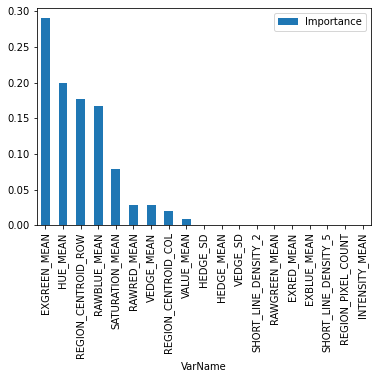

In [31]:
# variable importance: 
imp = {"VarName":image_train.columns[1:]
       , "Importance":dtree.feature_importances_}

print(pd.DataFrame(imp))

# Visualizing feature importance:
pd.DataFrame(imp).sort_values(by = 'Importance', ascending=False).plot.bar(x = 'VarName')

In [32]:
#error rate
print(error_rate(dtree,y_test,X_test))

0.10238095238095235


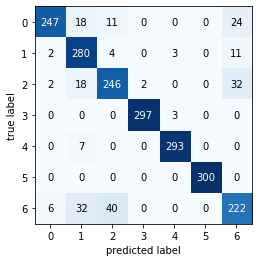

In [33]:
y_pred = dtree.predict(X_test)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred, binary = False))
plt.show()

In [34]:
image_train.groupby(by = 'REGION_TYPE').count()

,REGION_CENTROID_COL,REGION_CENTROID_ROW,REGION_PIXEL_COUNT,SHORT_LINE_DENSITY_5,SHORT_LINE_DENSITY_2,VEDGE_MEAN,VEDGE_SD,HEDGE_MEAN,HEDGE_SD,INTENSITY_MEAN,RAWRED_MEAN,RAWBLUE_MEAN,RAWGREEN_MEAN,EXRED_MEAN,EXBLUE_MEAN,EXGREEN_MEAN,VALUE_MEAN,SATURATION_MEAN,HUE_MEAN
REGION_TYPE,,,,,,,,,,,,,,,,,,,
BRICKFACE,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
CEMENT,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
FOLIAGE,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
GRASS,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
PATH,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
SKY,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
WINDOW,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30


## 3.2 Bagging Classifier - Decision Tree

In [45]:
#instantiation
baggingTree = BaggingClassifier(DecisionTreeClassifier()
                                , n_estimators=20)
baggingTree

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20)

In [46]:
#fit the model on the learning set
baggingTree.fit(X_app,y_app)

#evaluation
print(error_rate(baggingTree,y_test,X_test))

0.06999999999999995


In [47]:
#function - training / test for a given m - bagging approach
def train_test_bagging(m, X_app, y_app, X_test, y_test):
    """Calculates the error rate for a given set of data used in a bagging classifier and a given value of m number of estimators"""
    bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=m)
    bag.fit(X_app,y_app)
    return error_rate(bag, y_test, X_test)
#end train-test

In [48]:
#values of m to evaluate
m_a_tester = [1,5,10,20,50,100,200]
result = np.zeros(shape=(1,7))
result

array([[0., 0., 0., 0., 0., 0., 0.]])

In [49]:
#repeat 20 times the experiment for each m
for expe in range(20):
    #evaluate each value of m
    print("Iteration Number: " + str(expe))
    res = [train_test_bagging(m ,X_app, y_app, X_test, y_test) for m in m_a_tester]
    res = np.asarray(res).reshape(1,7)
    print("Vector of errors for Bagging iterations")
    print(res)
    #add a new row into the matrix
    result = np.append(result,res,axis=0)

result

Iteration Number: 0
Vector of errors for Bagging iterations
[[0.12190476 0.06571429 0.06380952 0.05857143 0.05428571 0.05809524
  0.06190476]]
Iteration Number: 1
Vector of errors for Bagging iterations
[[0.09428571 0.06666667 0.06619048 0.05380952 0.06095238 0.0552381
  0.05857143]]
Iteration Number: 2
Vector of errors for Bagging iterations
[[0.12428571 0.08       0.05952381 0.06238095 0.05571429 0.05666667
  0.05904762]]
Iteration Number: 3
Vector of errors for Bagging iterations
[[0.12809524 0.06190476 0.06047619 0.06571429 0.05809524 0.05809524
  0.05952381]]
Iteration Number: 4
Vector of errors for Bagging iterations
[[0.09952381 0.07142857 0.05952381 0.0547619  0.05571429 0.05857143
  0.05857143]]
Iteration Number: 5
Vector of errors for Bagging iterations
[[0.12       0.07238095 0.07571429 0.0547619  0.0547619  0.0552381
  0.0547619 ]]
Iteration Number: 6
Vector of errors for Bagging iterations
[[0.12380952 0.07571429 0.07571429 0.05619048 0.05619048 0.05761905
  0.05904762]]
I

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.12190476, 0.06571429, 0.06380952, 0.05857143, 0.05428571,
        0.05809524, 0.06190476],
       [0.09428571, 0.06666667, 0.06619048, 0.05380952, 0.06095238,
        0.0552381 , 0.05857143],
       [0.12428571, 0.08      , 0.05952381, 0.06238095, 0.05571429,
        0.05666667, 0.05904762],
       [0.12809524, 0.06190476, 0.06047619, 0.06571429, 0.05809524,
        0.05809524, 0.05952381],
       [0.09952381, 0.07142857, 0.05952381, 0.0547619 , 0.05571429,
        0.05857143, 0.05857143],
       [0.12      , 0.07238095, 0.07571429, 0.0547619 , 0.0547619 ,
        0.0552381 , 0.0547619 ],
       [0.12380952, 0.07571429, 0.07571429, 0.05619048, 0.05619048,
        0.05761905, 0.05904762],
       [0.11571429, 0.09047619, 0.05904762, 0.05333333, 0.05714286,
        0.05619048, 0.05857143],
       [0.11714286, 0.07380952, 0.06142857, 0.06      , 0.05952381,
        0.06142857, 0.0

In [50]:
#remove the first row
result = np.delete(result,0,axis=0)
#calculate the mean
mresult = np.mean(result,axis=0)
mresult

array([0.11516667, 0.0727381 , 0.06254762, 0.05845238, 0.05702381,
       0.05790476, 0.05885714])

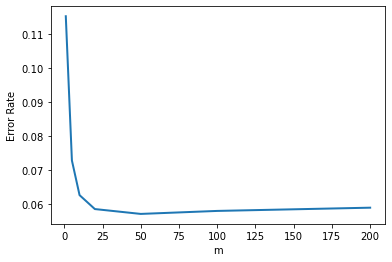

In [51]:
#label of the axes
plt.xlabel("m")
plt.ylabel("Error Rate")

plt.plot(m_a_tester,mresult,linewidth=2)

In [52]:
# the parameters to make vary
# the name of the parameter must be explicit
# we enumerate the values to try
parametres = [{"n_estimators":[1,5,10,20,50,100,200]}]

#instantiate the classifier
bag = BaggingClassifier(DecisionTreeClassifier())

#instantiation of the gris search tool
#the metric used is the accuracy rate (error rate = 1 - accuracy rate)
grid_bag = GridSearchCV(cv = 10, estimator=bag, param_grid=parametres, scoring="accuracy")

#launching the exploration
grille_bag = grid_bag.fit(X_app,y_app)

In [53]:
grille_bag.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200)

In [30]:
grille_bag.best_params_

{'n_estimators': 200}

In [54]:
print(error_rate(grille_bag,y_test,X_test))

0.05476190476190479


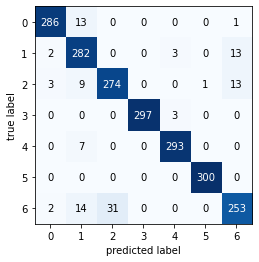

In [55]:
y_pred = grille_bag.predict(X_test)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred, binary = False))
plt.show()

## 3.3 Random Forest Classifier

In [56]:
#instantiation
rf = RandomForestClassifier(n_estimators=20)

#learning phase
rf.fit(X_app,y_app)

#test error rate
print(error_rate(rf,y_test,X_test))

#importance of variables
print(rf.feature_importances_)

#with the name of the variables
imp = {"VarName":image_train.columns[1:],"Importance":rf.feature_importances_}
print(pd.DataFrame(imp))

0.04904761904761901
[0.021477   0.11872464 0.         0.00328824 0.00270581 0.0240432
 0.02277247 0.03421393 0.01876674 0.07672086 0.0972575  0.08291332
 0.07001741 0.07108427 0.0505829  0.09427854 0.0376791  0.04542743
 0.12804663]
                 VarName  Importance
0    REGION_CENTROID_COL    0.021477
1    REGION_CENTROID_ROW    0.118725
2     REGION_PIXEL_COUNT    0.000000
3   SHORT_LINE_DENSITY_5    0.003288
4   SHORT_LINE_DENSITY_2    0.002706
5             VEDGE_MEAN    0.024043
6               VEDGE_SD    0.022772
7             HEDGE_MEAN    0.034214
8               HEDGE_SD    0.018767
9         INTENSITY_MEAN    0.076721
10           RAWRED_MEAN    0.097258
11          RAWBLUE_MEAN    0.082913
12         RAWGREEN_MEAN    0.070017
13            EXRED_MEAN    0.071084
14           EXBLUE_MEAN    0.050583
15          EXGREEN_MEAN    0.094279
16            VALUE_MEAN    0.037679
17       SATURATION_MEAN    0.045427
18              HUE_MEAN    0.128047


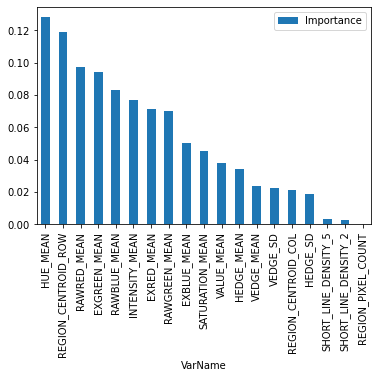

In [57]:
# Visualizing feature importance:
pd.DataFrame(imp).sort_values(by = 'Importance', ascending=False).plot.bar(x = 'VarName')

In [58]:
#tree number to test
parametres = [{"n_estimators":[1,5,10,20,50,100,200]}]

#instantiation
grid_rf = GridSearchCV(cv = 10, estimator=RandomForestClassifier(), param_grid=parametres, scoring="accuracy", verbose = True)

#lauching the exploration
grille_rf = grid_rf.fit(X_app,y_app)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    4.1s finished


In [59]:
grille_rf.best_params_

{'n_estimators': 200}

In [60]:
print(error_rate(grille_rf, y_test, X_test))

0.042857142857142816


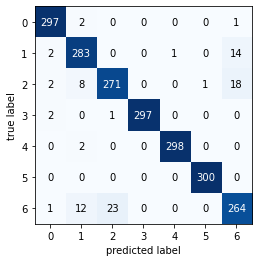

In [61]:
y_pred = grille_rf.predict(X_test)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred, binary = False))
plt.show()

Results obtained seem to improve heavily with Random Forest. If we want to use this algorithm we should do an exercise of feature selection to avoid feature correlation to impact heavily in ur model results

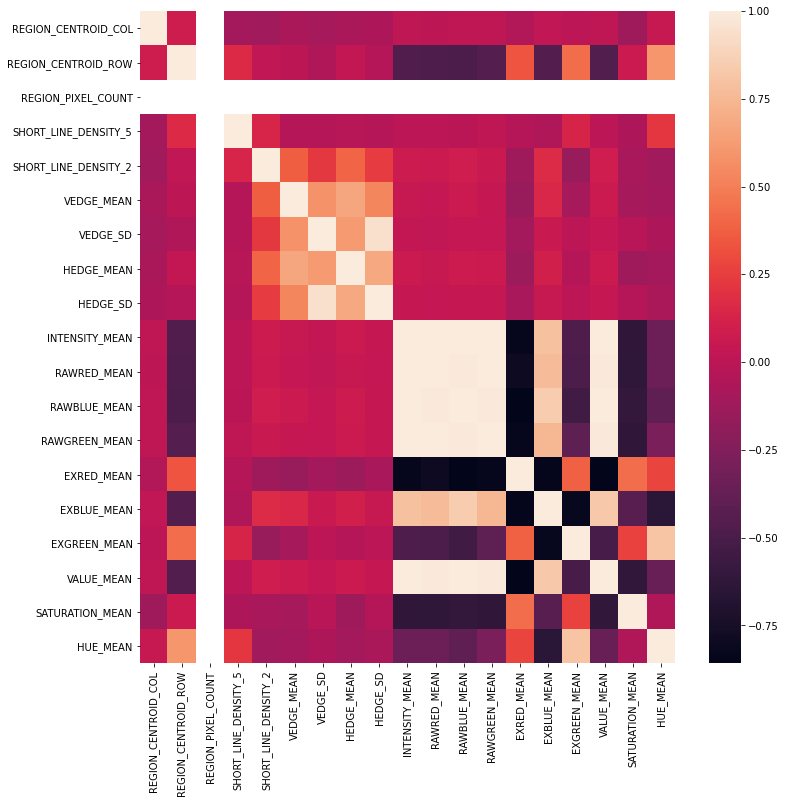

In [62]:
import seaborn as sn
plt.figure(figsize=(12, 12))
sn.heatmap(image_train.iloc[:,1:20].corr())

First we identify the features highlghly correlated with the features with highest importance for random forest: 

HUE_MEAN Correlation vector:


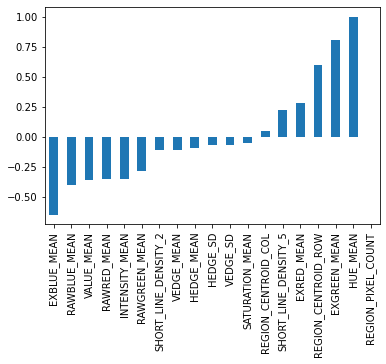

In [63]:
print("HUE_MEAN Correlation vector:")
image_train.iloc[:,1:20].corr().HUE_MEAN.sort_values().plot.bar(x = 'VarName')

In [64]:
feature_drop = ['EXGREEN_MEAN', 'REGION_CENTROID_ROW', 'EXBLUE_MEAN']
feature_drop

['EXGREEN_MEAN', 'REGION_CENTROID_ROW', 'EXBLUE_MEAN']

VALUE_MEAN Correlation vector:


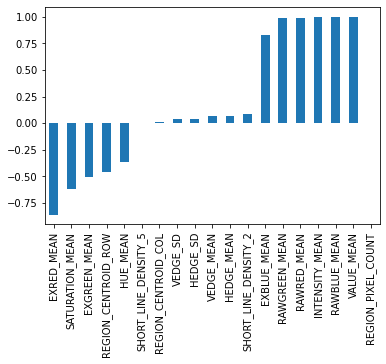

In [65]:
print("VALUE_MEAN Correlation vector:")
image_train.iloc[:,1:20].corr().VALUE_MEAN.sort_values().plot.bar(x = 'VarName')

In [66]:
feature_drop.extend(['EXRED_MEAN', 'SATURATION_MEAN', 'RAWBLUE_MEAN', 'INTENSITY_MEAN', 'RAWRED_MEAN'])

In [67]:
print("Features to be dropped based on correlation study:")
print(feature_drop)

Features to be dropped based on correlation study:
['EXGREEN_MEAN', 'REGION_CENTROID_ROW', 'EXBLUE_MEAN', 'EXRED_MEAN', 'SATURATION_MEAN', 'RAWBLUE_MEAN', 'INTENSITY_MEAN', 'RAWRED_MEAN']


From this point we drop the features that are highly correlated with eachother to ensure our random forest model is robust enough:

In [68]:
# We generate a new training and testing dataset without the features selected:
image_train_drop = image_train.drop(feature_drop, axis = 1)
image_train_drop.columns

Index(['REGION_TYPE', 'REGION_CENTROID_COL', 'REGION_PIXEL_COUNT',
       'SHORT_LINE_DENSITY_5', 'SHORT_LINE_DENSITY_2', 'VEDGE_MEAN',
       'VEDGE_SD', 'HEDGE_MEAN', 'HEDGE_SD', 'RAWGREEN_MEAN', 'VALUE_MEAN',
       'HUE_MEAN'],
      dtype='object')

In [70]:
#transformation into a NumPy matrix
d_train_drop = image_train.drop(feature_drop, axis = 1).to_numpy()
y_app_drop = d_train_drop[:,0]
X_app_drop = d_train_drop[:,1:12]

In [71]:
image_test_drop = (raw_data[raw_data["sample"]=="test"]).drop(feature_drop, axis = 1)
image_test_drop

,REGION_TYPE,REGION_CENTROID_COL,REGION_PIXEL_COUNT,SHORT_LINE_DENSITY_5,SHORT_LINE_DENSITY_2,VEDGE_MEAN,VEDGE_SD,HEDGE_MEAN,HEDGE_SD,RAWGREEN_MEAN,VALUE_MEAN,HUE_MEAN,sample
210,GRASS,110,9,0.000000,0.0,1.0000,0.6667,1.2222,1.1863,18.6667,18.6667,1.9109,test
211,GRASS,86,9,0.000000,0.0,1.1111,0.7201,1.4444,0.7503,19.2222,19.2222,1.9415,test
212,GRASS,225,9,0.000000,0.0,3.3889,2.1951,3.0000,1.5202,17.1111,17.1111,1.9879,test
213,GRASS,47,9,0.000000,0.0,1.2778,1.2546,1.0000,0.8944,18.1111,18.1111,1.8754,test
214,GRASS,97,9,0.000000,0.0,1.1667,0.6912,1.1667,1.0055,21.1111,21.1111,1.8637,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,CEMENT,32,9,0.000000,0.0,0.9444,0.8630,0.8333,0.6111,5.6667,11.8889,-1.9828,test
2306,CEMENT,8,9,0.111111,0.0,1.6111,2.0630,0.3333,0.1333,6.4444,12.0000,-2.0449,test
2307,CEMENT,128,9,0.000000,0.0,0.5556,0.2519,0.7778,0.1630,5.0000,10.8889,-1.9963,test
2308,CEMENT,150,9,0.000000,0.0,2.1667,1.6333,1.3889,0.4185,6.1111,12.2222,-1.9434,test


In [72]:
y_test_drop = image_test_drop.to_numpy()[:,0]
X_test_drop = image_test_drop.to_numpy()[:,1:12]

In [73]:
#instantiation
rf_drop = RandomForestClassifier(n_estimators=20)

#learning phase
rf_drop.fit(X_app_drop,y_app_drop)

#test error rate
print(error_rate(rf_drop,y_test_drop,X_test_drop))

#importance of variables
print(rf_drop.feature_importances_)

#with the name of the variables
imp_drop = {"VarName":image_train_drop.columns[1:],"Importance":rf_drop.feature_importances_}
print(pd.DataFrame(imp_drop))

0.10857142857142854
[0.05060268 0.         0.00383749 0.0066046  0.04822758 0.04741159
 0.11093381 0.06694148 0.19622704 0.20854667 0.26066705]
                 VarName  Importance
0    REGION_CENTROID_COL    0.050603
1     REGION_PIXEL_COUNT    0.000000
2   SHORT_LINE_DENSITY_5    0.003837
3   SHORT_LINE_DENSITY_2    0.006605
4             VEDGE_MEAN    0.048228
5               VEDGE_SD    0.047412
6             HEDGE_MEAN    0.110934
7               HEDGE_SD    0.066941
8          RAWGREEN_MEAN    0.196227
9             VALUE_MEAN    0.208547
10              HUE_MEAN    0.260667


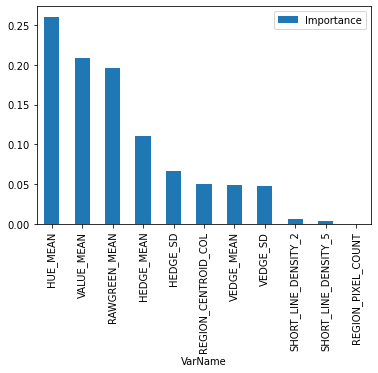

In [74]:
# Visualizing feature importance:
pd.DataFrame(imp_drop).sort_values(by = 'Importance', ascending=False).plot.bar(x = 'VarName')

In [75]:
#tree number to test
parametres = [{"n_estimators":[1,5,10,20,50,100,200]}]

#instantiation
grid_rf_drop = GridSearchCV(cv = 10, estimator=RandomForestClassifier(), param_grid=parametres, scoring="accuracy", verbose = True)

#lauching the exploration
grille_rf_drop = grid_rf_drop.fit(X_app_drop,y_app_drop)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    4.0s finished


In [76]:
grille_rf_drop.best_params_
print(error_rate(grille_rf_drop, y_test_drop, X_test_drop))

0.10428571428571431


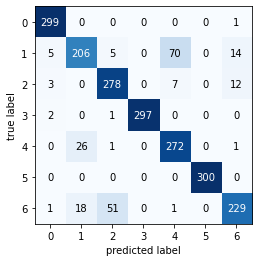

In [77]:
y_pred_drop = grille_rf_drop.predict(X_test_drop)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test_drop, y_pred_drop, binary = False))
plt.show()

## 3.4 Adaboost

In [78]:
#instantiation
ab = AdaBoostClassifier(algorithm="SAMME"
                        , n_estimators=200
                        , base_estimator = DecisionTreeClassifier())
print(ab)

#fitting on the training set
ab.fit(X_app,y_app)

AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   n_estimators=200)


AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   n_estimators=200)

In [79]:
#with the name of the variables
imp = {"VarName":image_train.columns[1:],"Importance":ab.feature_importances_}
print(pd.DataFrame(imp))

                 VarName    Importance
0    REGION_CENTROID_COL  1.031746e-02
1    REGION_CENTROID_ROW  1.954881e-01
2     REGION_PIXEL_COUNT  0.000000e+00
3   SHORT_LINE_DENSITY_5  9.876543e-03
4   SHORT_LINE_DENSITY_2  0.000000e+00
5             VEDGE_MEAN  1.040621e-02
6               VEDGE_SD  0.000000e+00
7             HEDGE_MEAN  0.000000e+00
8               HEDGE_SD  5.555556e-03
9         INTENSITY_MEAN  1.666667e-01
10           RAWRED_MEAN  6.414622e-17
11          RAWBLUE_MEAN  0.000000e+00
12         RAWGREEN_MEAN  2.324393e-02
13            EXRED_MEAN  7.407407e-03
14           EXBLUE_MEAN  0.000000e+00
15          EXGREEN_MEAN  2.825883e-01
16            VALUE_MEAN  0.000000e+00
17       SATURATION_MEAN  7.939678e-02
18              HUE_MEAN  2.090531e-01


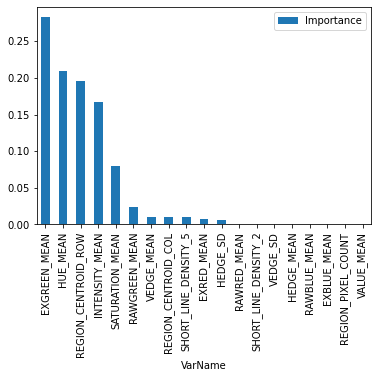

In [80]:
# Visualizing feature importance:
pd.DataFrame(imp).sort_values(by = 'Importance', ascending=False).plot.bar(x = 'VarName')

In [81]:
#evaluation
print(error_rate(ab,y_test,X_test))

0.08952380952380956


In [82]:
param_ab = [{"n_estimators":[10,20,50,100,200]
                 , "learning_rate": [0.001, 0.025, 0.05, 0.1, 0.2, 0.5]}]

grid_ab = GridSearchCV(cv = 10, estimator=AdaBoostClassifier(), param_grid=param_ab, scoring="accuracy", verbose = True)

#lauching the exploration
grille_ab = grid_ab.fit(X_app,y_app)
grille_ab

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   31.4s finished


GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid=[{'learning_rate': [0.001, 0.025, 0.05, 0.1, 0.2, 0.5],
                          'n_estimators': [10, 20, 50, 100, 200]}],
             scoring='accuracy', verbose=True)

In [83]:
grille_ab.best_params_

{'learning_rate': 0.05, 'n_estimators': 50}

In [84]:
print(error_rate(grille_ab, y_test, X_test))

0.1395238095238095


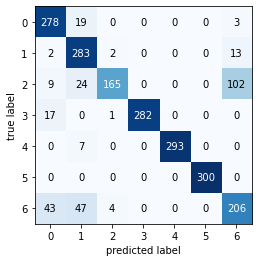

In [85]:
y_pred = grille_ab.predict(X_test)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred, binary = False))
plt.show()

## 3.5 Final Results

In [86]:
final_results = {'Model': ['Decision Tree'
                           , 'Bagging Classifier'
                           , 'Random Forest'
                           , 'Random Forest with Feature Drop'
                           , 'Adaboost']
                 , 'Error Rate': [error_rate(dtree,y_test,X_test)
                                  , error_rate(baggingTree,y_test,X_test)
                                  , error_rate(grille_rf,y_test,X_test)
                                  , error_rate(grille_rf_drop,y_test_drop,X_test_drop)
                                  , error_rate(grille_ab,y_test,X_test)]}

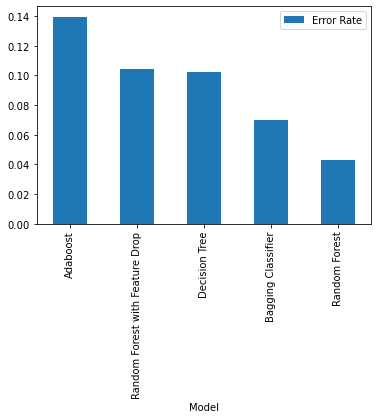

In [87]:
pd.DataFrame(final_results).sort_values(by = 'Error Rate', ascending=False).plot.bar(x = 'Model')